# Question 1 
Consider two classes described by the covariance matrices below (assume zero mean) (15)
A. ∑ = [1 0 0 1] B. ∑ = [−22 −32]

a) For each matrix generate 1000 data samples and plot them on separate figures.

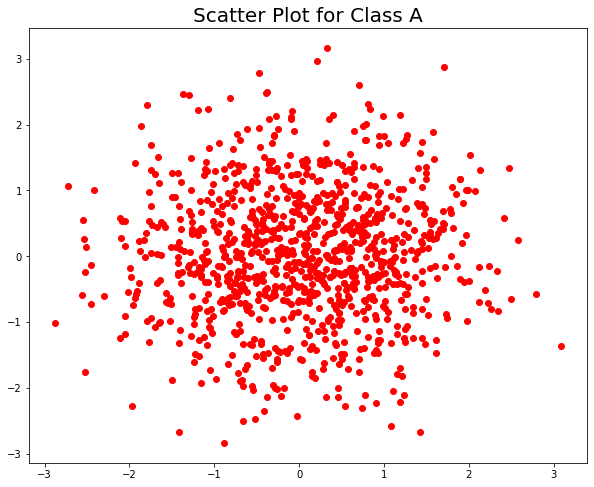

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#Genrating data samples for class A
mean_a = [0, 0]
cov_a  = [[1, 0], [0, 1]]
N = 1000
#data_a = np.random.multivariate_normal(mean_a, cov_a, N)
L = np.linalg.cholesky(cov_a)
#print(L)
uncorrelated = np.random.standard_normal((2,N))
#print(uncorrelated)
data_at = np.dot(L,uncorrelated) + np.array(mean_a).reshape(2,1)
data_a  = data_at.transpose()
#ploting class A and class B
fig = plt.figure(figsize=(10,8))
plt.title("Scatter Plot for Class A", Fontsize=20)
plt.scatter(data_a[:,0], data_a[:,1], c='red')

fig.savefig('q1_sp_cA.jpg')

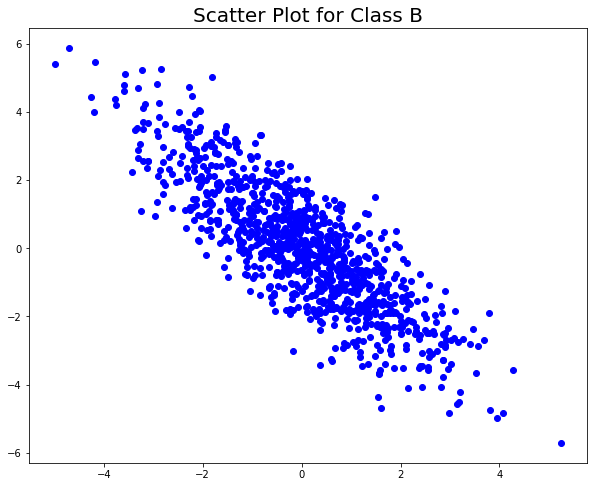

In [3]:

#Genrating data samples for class B 
mean_b = [0, 0]
cov_b  = [[2, -2], [-2, 3]] 
N = 1000
#data_b = np.random.multivariate_normal(mean_b, cov_b, N)
L = np.linalg.cholesky(cov_b)
uncorrelated = np.random.standard_normal((2,N))
data_bt = np.dot(L,uncorrelated) + np.array(mean_b).reshape(2,1)
data_b  = data_bt.transpose()

#ploting class B
fig = plt.figure(figsize=(10,8))
plt.title("Scatter Plot for Class B", fontsize=20)
plt.scatter(data_b[:,0], data_b[:,1], c='blue')
fig.savefig('q1_sp_cB.jpg')

# Question 1(b)
For each case calculate first standard deviation contour as a function of the mean,eigenvalues, and eigenvectors. Show your calculation (Hint: 
consider distribution whitening from the tutorial). You may use preexisting functions for Eigen computation.Plot each contour on the respective 
plots from part (a).

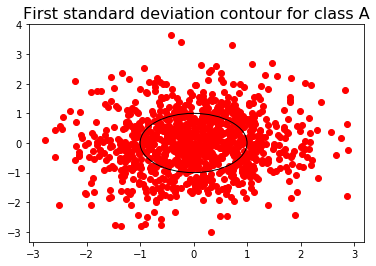

In [11]:
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

#plotting standard dev plot for class A
mean_a = [0, 0]
cov_a  = [[1, 0], [0, 1]]
eigen_val, eigen_vec = np.linalg.eig(cov_a)
rad = np.sqrt(eigen_val)
theta = np.degrees(np.arctan2(*eigen_vec[:,0][::-1]))

ax1 = plt.subplot(111)
w = 2 * np.sqrt(eigen_val[0])
h = 2 * np.sqrt(eigen_val[1])

ell = Ellipse(xy=(0,0),width=w, height=h, angle=theta, color='black')
ell.set_facecolor('none')
ax1.add_artist(ell)

#fig = plt.figure(figsize=(10,8))
plt.title("First standard deviation contour for class A", fontsize=16)
plt.scatter(data_a[:,0], data_a[:,1], c='red')
fig.savefig('q1_sd_ca.jpg')
plt.show()


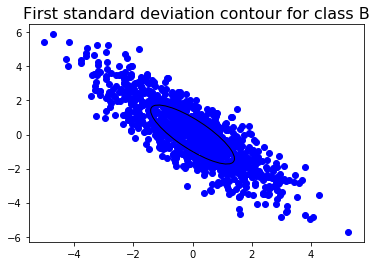

In [10]:
#plotting standard dev plot for class B 
mean_b = [0, 0]
cov_b  = [[2, -2], [-2, 3]] 

eigen_val, eigen_vec = np.linalg.eig(cov_b)
rad = np.sqrt(eigen_val)
theta =  np.degrees(np.arctan2(*eigen_vec[:,0][::-1]))

ax = plt.subplot(111)
w = 2 * np.sqrt(eigen_val[0])
h = 2 * np.sqrt(eigen_val[1])

ell = Ellipse(xy=(0,0),width=w, height=h, angle=theta, color='black')
ell.set_facecolor('none')
ax.add_artist(ell)
plt.title("First standard deviation contour for class B", fontsize=16)
plt.scatter(data_b[:,0], data_b[:,1], c='blue')
plt.savefig('q1_sd_cb.jpg')
plt.show()

# Question 1(c)
Calculate sample covariance matrices for each class using the data generated in part.
Do not use a Python/Matlab function for computing the covariance.

In [6]:
#Covariance matrix of dataset A
mean_col0 = data_a[:,0].mean()
mean_col1 = data_a[:,1].mean()
mean_a = np.column_stack(([mean_col0], [mean_col1]))
dev_a = data_a - np.dot(np.ones((1000,1)), mean_a)
var_a  = np.dot(dev_a.transpose(), dev_a)
print("Covariance Matrix of Class A")
print(var_a/(N-1))

Covariance Matrix of Class A
[[0.96923573 0.07264386]
 [0.07264386 0.98298583]]


In [7]:
#Covariance matrix of dataset B
mean_col0 = data_b[:,0].mean()
mean_col1 = data_b[:,1].mean()
mean_b = np.column_stack(([mean_col0], [mean_col1])) 
dev_b = data_b - np.dot(np.ones((1000,1)), mean_b)
var_b  = np.dot(dev_b.transpose(), dev_b)
print("Covariance Matrix of Class B")
print(var_b/999)

Covariance Matrix of Class B
[[ 2.32859047 -2.36460023]
 [-2.36460023  3.44351309]]
